# UTS Machine Learning Kelompok 4

## Anggota Kelompok :
- Ema Nelvi Saleky ()
- Philemon (232102317)
- Timotius ()

## Deskripsi Project :  

Proyek ini bertujuan untuk mengembangkan dan mengimplementasikan model machine
learning yang dapat memprediksi gangguan tidur berdasarkan faktor kesehatan dan gaya hidup.
Model ini diharapkan mampu memberikan prediksi yang lebih akurat dibandingkan dengan
metode tradisional, serta menghasilkan wawasan baru tentang faktor-faktor utama yang
mempengaruhi gangguan tidur.

# Step 1. Import Dataset & Library Python

## 1. Import Library
Library yang digunakan termasuk :
- Numpy (Pemrosesan data)
- Pandas (Container data)
- Matplotlib & Seaborn (Visualisasi data)
- Sklearn (Algoritma machine learning & metriks penilaian)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

## 2. Import dataset
---

Data Sleep, Health, and Lifestyle memiliki 400 baris dan 13 kolom yang menjelaskan tentang pola tidur dan kesehatan seseorang. Data ini memiliki fitur-fitur sebagai berikut :  

● Person ID: Nomor identifikasi untuk setiap orang.

● Gender: Jenis kelamin setiap orang.

● Age: Umur setiap orang dalam satuan tahun.

● Occupation: Pekerjaan setiap orang.

● Sleep Duration (hours): Waktu tidur setiap orang dalam satuan jam.

● Quality of Sleep (scale: 1-10): Sebuah rating yang sifatnya subjektif untuk seberapa
nyenyak tidur setiap orang.

● Physical Activity Level (minutes/day): Jumlah waktu berapa lama setiap orang
melakukan aktivitas fisik dalam satuan menit.

● Stress Level (scale: 1-10): Sebuah rating yang sifatnya subjektif untuk seberapa tinggi level stres setiap orang.

● BMI Category: Kategori BMI untuk setiap orang (e.g., Underweight, Normal, Overweight).

● Blood Pressure (systolic/diastolic): Pengukuran tekanan darah untuk setiap orang,
diindikasikan sebagai tekanan sistolik diatas tekanan diastolik.

● Heart Rate (bpm): frekuensi detak jantung saat beristirahat, diukur dalam satuan detak
per menit.

● Daily Steps: Jumlah langkah yang diambil setiap orang per hari.

● Sleep Disorder: Jenis gangguan tidur yang dialami setiap orang (None, Insomnia, Sleep
Apnea).

---

### Alasan pemilihan data :

- Jumlah data mencukupi untuk training model.
- Fitur inti yang ditawarkan sangat baik menggambarkan beberapa hal yang dapat menjadi penentu ada atau tidaknya Sleep Disorder.


In [2]:
dataset = "dataset.csv"

df = pd.read_csv(dataset)
df.head()
# seriess = df['Occupation'].unique()
# print(seriess.shape)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Step 2. Exploratory Data Analytics

## 1. Visualisasi dataset

Dataset akan divisualisasikan menggunakan matplotlib dan seaborn dengan bentuk chart yang merepresentasikan data yang digunakan.

Fitur-fitur yang digunakan dalam visualisasi:
- Stress Level
- Quality of Sleep
- Sleep Disorder

Dengan asumsi bahwa sleep disorder tidak dipengaruhi oleh faktor lain seperti BMI, Occupation, dan lain lain, maka hasil visualisasi dapat ditampilkan seperti ini.



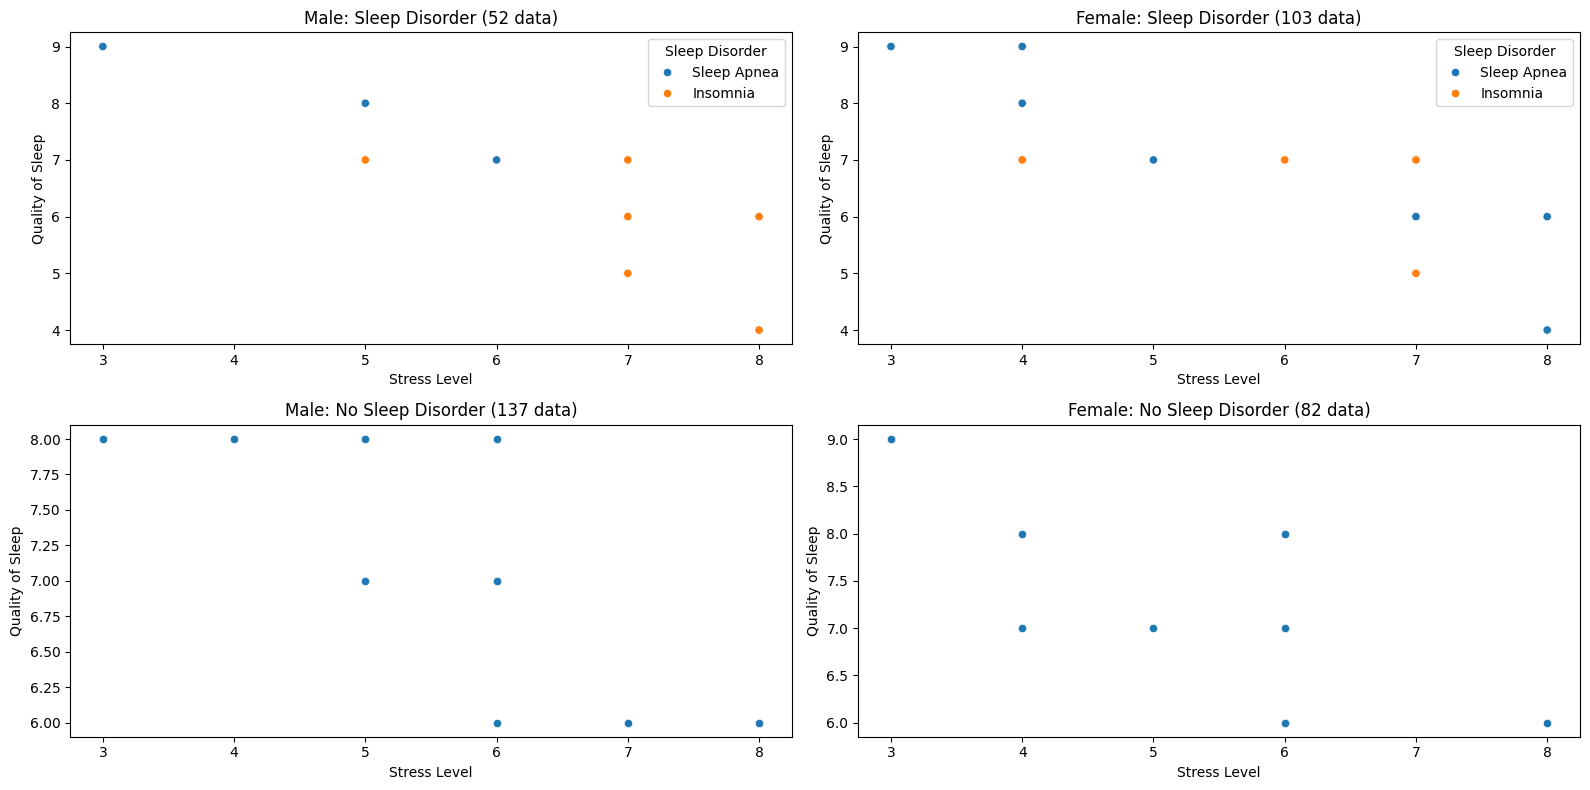

In [6]:
fig = plt.figure(figsize=(16,8))

male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

male_disorder_df = male_df[~male_df['Sleep Disorder'].isnull()]
female_disorder_df = female_df[~female_df['Sleep Disorder'].isnull()]
male_non_disorder_df = male_df[male_df['Sleep Disorder'].isnull()]
female_non_disorder_df = female_df[female_df['Sleep Disorder'].isnull()]

# With Sleep Disorder

plt.subplot(2,2,1)
sns.scatterplot(
    data=male_disorder_df,
    x='Stress Level',
    y='Quality of Sleep',
    hue='Sleep Disorder'
)
plt.title(f'Male: Sleep Disorder ({male_disorder_df.shape[0]} data)')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

plt.subplot(2,2,2)
sns.scatterplot(
    data=female_disorder_df,
    x='Stress Level',
    y='Quality of Sleep',
    hue='Sleep Disorder'
)
plt.title(f'Female: Sleep Disorder ({female_disorder_df.shape[0]} data)')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

# Without Sleep Disorder

plt.subplot(2,2,3)
sns.scatterplot(
    data=male_non_disorder_df,
    x='Stress Level',
    y='Quality of Sleep'
)
plt.title(f'Male: No Sleep Disorder ({male_non_disorder_df.shape[0]} data)')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

plt.subplot(2,2,4)
sns.scatterplot(
    data=female_non_disorder_df,
    x='Stress Level',
    y='Quality of Sleep'
)
plt.title(f'Female: No Sleep Disorder ({female_non_disorder_df.shape[0]} data)')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

plt.tight_layout()
plt.show()

Namun, Sleep Disorder tentu dipengaruhi oleh faktor faktor lain seperti:
- BMI (Body Mass Index)
- Occupation (Pekerjaan)
- Age (Usia)
- Physical Activity Level (Tingkat aktivitas fisik)
- Sleep Duration (Durasi tidur)

Pengaruh faktor-faktor tersebut dapat divisualisasikan seperti berikut :
- Pengaruh BMI pada Sleep Disorder
- Kaitan Pekerjaan dan Sleep Disorder
- Pengaruh Usia dan Durasi tidur terhadap Sleep Disorder
- Korelasi antara aktivitas fisik dan Sleep Disorder

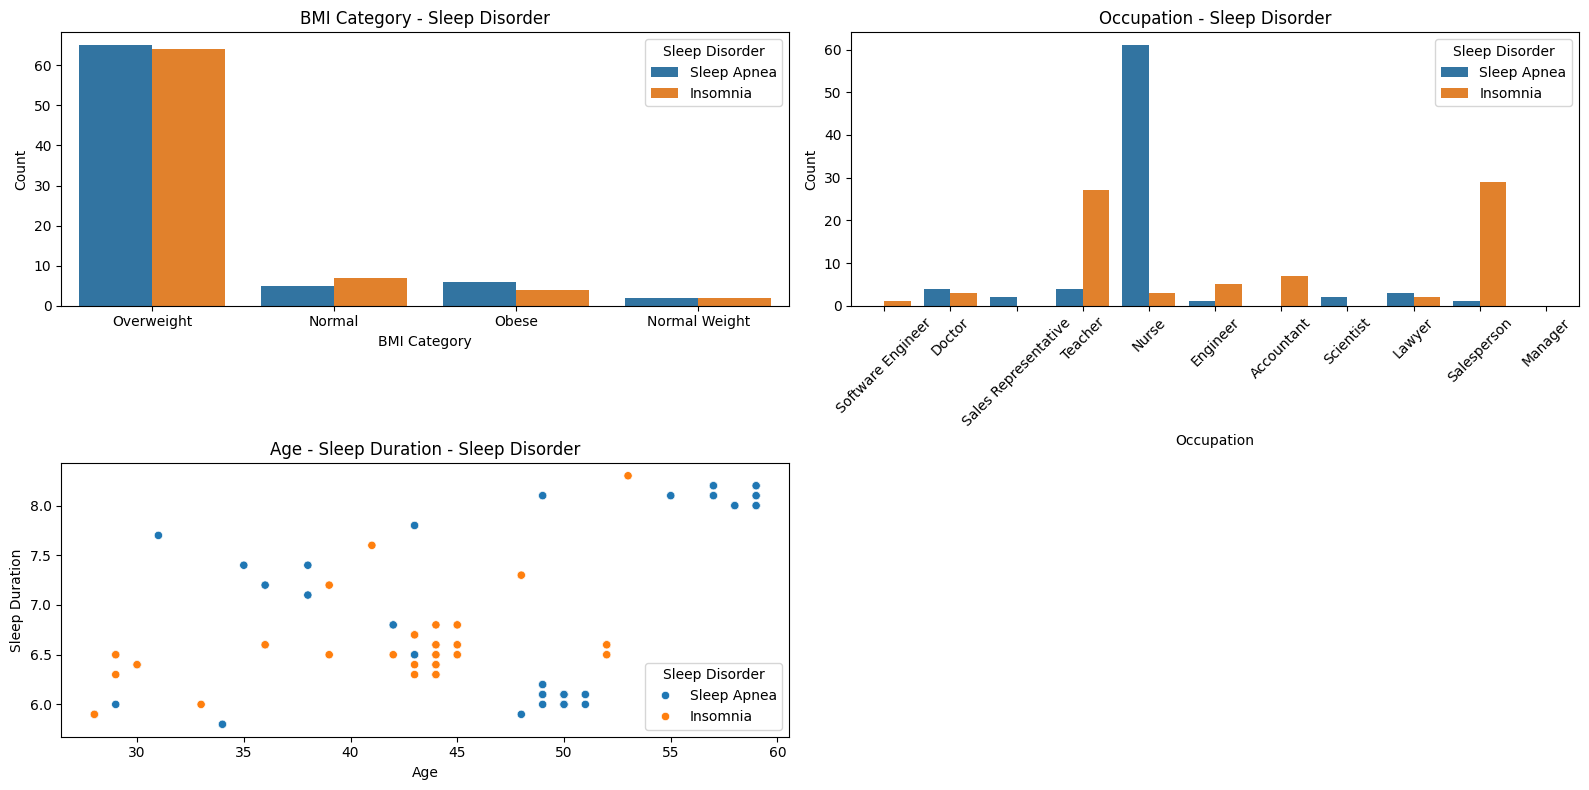

In [17]:
plt.figure(figsize=(16, 8))

plt.subplot(2,2,1)
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder')
plt.title('BMI Category - Sleep Disorder')
plt.xlabel('BMI Category')
plt.ylabel('Count')


plt.subplot(2,2,2)
sns.countplot(data=df, x='Occupation', hue='Sleep Disorder')
plt.title('Occupation - Sleep Disorder')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.scatterplot(data=df, x='Age', y='Sleep Duration', hue='Sleep Disorder')
plt.title('Age - Sleep Duration - Sleep Disorder')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')

plt.tight_layout()
plt.show()


# Step 3. Data Preprocessing

# Step 4. Model Training & Tuning

## 1. Train test split

# Step 5. Evaluation Metrix

# Step 6. Result Visualization

# Kesimpulan